# Tugas 4 (EDA dan Klasifikasi)

# **Exploratory Data Analysis**

# Pendahuluan

Dalam tugas ini, kami melakukan analisis eksplorasi data (EDA) dan klasifikasi menggunakan dataset yang berkaitan dengan prediksi pesanan. Dataset terdiri dari dua bagian utama: data latih dan data uji, yang masing-masing berisi berbagai fitur yang menggambarkan perilaku pelanggan dan karakteristik produk. Kami menggunakan berbagai teknik praproses untuk membersihkan dan menyiapkan data, termasuk mengatasi nilai yang hilang dan melakukan one-hot encoding untuk kolom kategorikal. Setelah itu, kami melatih model klasifikasi menggunakan algoritma Random Forest untuk memprediksi apakah sebuah pesanan akan terjadi atau tidak. Hasil dari model dievaluasi menggunakan metrik seperti akurasi, precision, recall, dan F1-score, serta divisualisasikan menggunakan confusion matrix dan ROC curve untuk memberikan pemahaman yang lebih baik tentang kinerja model.

Kelompok 10

1.  Muhammad Igin Adigholib (2301125)
2.  Rahmat Taufik Al-Hidayah (2300414)
3.  Anugrah Bayu Satrio (2300624)
4.  Muhamad Khafabillah Sopian (2307824)
5.  Rexy Putra Nur Laksana (2309578)



# Perpustakaan

In [128]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from os.path import join
from IPython.core.display import display, HTML

# Impor Drive

**Menghubungkan Google Colab dengan Google Drive untuk mengakses file yang tersimpan di dalamnya.**

In [129]:
from google.colab import drive
drive.mount('/content/drive')
dir = "/content/drive/MyDrive/Tugas EDA 3/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Mengakses File**

In [130]:
# memuat data dari csv
Transact_Train = pd.read_csv(join(dir, "Transact_Train.csv"))
Transact_Class = pd.read_csv(join(dir, "transact_class.csv"))
Task_1 = pd.read_csv(join(dir, "task1.csv"))

# **Menampilkan Isi Data Teratas Data Transact Train**

In [131]:
Transact_Train.head()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder,order
0,1,6,5,0.000,1,59.99,59.99,59.99,1,59.99,...,?,1,600,70,21,1,43,1,49,y
1,1,6,5,11.940,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1,600,70,21,1,43,1,49,y
2,1,6,5,39.887,1,59.99,59.99,59.99,1,59.99,...,completely orderable,1,600,70,21,1,43,1,49,y
3,2,6,5,0.000,0,?,?,?,0,?,...,completely orderable,?,?,?,?,?,?,?,?,y
4,2,6,5,15.633,0,?,?,?,0,?,...,completely orderable,?,?,?,?,?,?,?,?,y


# **Struktur dan Informasi Data Transact Train**

In [132]:
Transact_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429013 entries, 0 to 429012
Data columns (total 24 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   sessionNo        429013 non-null  int64  
 1   startHour        429013 non-null  int64  
 2   startWeekday     429013 non-null  int64  
 3   duration         429013 non-null  float64
 4   cCount           429013 non-null  int64  
 5   cMinPrice        429013 non-null  object 
 6   cMaxPrice        429013 non-null  object 
 7   cSumPrice        429013 non-null  object 
 8   bCount           429013 non-null  int64  
 9   bMinPrice        429013 non-null  object 
 10  bMaxPrice        429013 non-null  object 
 11  bSumPrice        429013 non-null  object 
 12  bStep            429013 non-null  object 
 13  onlineStatus     429013 non-null  object 
 14  availability     429013 non-null  object 
 15  customerNo       429013 non-null  object 
 16  maxVal           429013 non-null  obje

# **Statistik Deskriptif Dataset Transact Train**

In [133]:
Transact_Train.describe()

,sessionNo,startHour,startWeekday,duration,cCount,bCount
count,429013.000000,429013.000000,429013.000000,429013.000000,429013.000000,429013.000000
mean,25274.631293,14.617061,5.924839,1573.901640,24.140317,4.135168
std,14441.366146,4.485914,0.790930,2427.123356,30.398164,4.451778
min,1.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,12731.000000,11.000000,5.000000,225.070000,5.000000,1.000000
50%,25470.000000,15.000000,6.000000,738.199000,13.000000,3.000000
75%,37542.000000,18.000000,7.000000,1880.265000,31.000000,5.000000
max,50000.000000,23.000000,7.000000,21580.092000,200.000000,108.000000


# **Menampilkan Isi Data Teratas Data Transact Class**

In [134]:
Transact_Class.head()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,...,onlineStatus,availability,customerNo,maxVal,customerScore,accountLifetime,payments,age,address,lastOrder
0,1,18,7,136.833,3,39.99,39.99,79.98,1,39.99,...,y,completely orderable,25039,1300,489,188,5,49,1,65
1,1,18,7,189.984,3,39.99,39.99,79.98,1,39.99,...,y,completely orderable,25039,1300,489,188,5,49,1,65
2,1,18,7,342.894,6,16.99,39.99,113.96,2,16.99,...,?,?,25039,1300,489,188,5,49,1,65
3,1,18,7,411.051,8,16.99,39.99,149.94,3,16.99,...,?,?,25039,1300,489,188,5,49,1,65
4,1,18,7,460.049,10,16.99,39.99,189.92,4,16.99,...,?,?,25039,1300,489,188,5,49,1,65


# **Struktur dan Informasi Data Transact Class**

In [135]:
Transact_Class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45068 entries, 0 to 45067
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sessionNo        45068 non-null  int64  
 1   startHour        45068 non-null  int64  
 2   startWeekday     45068 non-null  int64  
 3   duration         45068 non-null  float64
 4   cCount           45068 non-null  int64  
 5   cMinPrice        44742 non-null  float64
 6   cMaxPrice        44742 non-null  float64
 7   cSumPrice        44742 non-null  float64
 8   bCount           45068 non-null  int64  
 9   bMinPrice        44479 non-null  float64
 10  bMaxPrice        44479 non-null  float64
 11  bSumPrice        44479 non-null  float64
 12  bStep            45068 non-null  object 
 13  onlineStatus     45068 non-null  object 
 14  availability     45068 non-null  object 
 15  customerNo       45068 non-null  object 
 16  maxVal           45068 non-null  object 
 17  customerScor

# **Statistik Deskriptif Dataset Transact Class**

In [136]:
Transact_Class.describe()

,sessionNo,startHour,startWeekday,duration,cCount,cMinPrice,cMaxPrice,cSumPrice,bCount,bMinPrice,bMaxPrice,bSumPrice
count,45068.000000,45068.000000,45068.000000,45068.000000,45068.000000,44742.000000,44742.000000,44742.000000,45068.000000,44479.000000,44479.000000,44479.000000
mean,2385.701185,18.589509,6.458418,1645.291183,27.316810,53.299304,149.135132,1240.985675,4.366668,65.935684,105.750478,209.595122
std,1426.206838,5.543531,1.719373,2279.003964,32.549188,146.774665,272.250373,3523.665302,4.333860,172.340996,204.394800,414.707600
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1166.000000,19.000000,7.000000,259.884500,6.000000,5.000000,29.990000,154.370000,1.000000,7.990000,19.990000,39.990000
50%,2331.000000,20.000000,7.000000,864.808000,15.000000,9.990000,49.990000,445.540000,3.000000,12.990000,34.990000,89.970000
75%,3600.000000,21.000000,7.000000,2148.555000,36.000000,24.990000,99.990000,1164.570000,6.000000,29.990000,69.990000,209.850000
max,5111.000000,23.000000,7.000000,21320.113000,200.000000,1999.990000,4799.000000,117310.700000,43.000000,1999.990000,2299.990000,8948.960000


# **Ukuran Dataset dan Tipe Data**

In [137]:
# Mengecek ukuran dataset
print("Ukuran dataset:", Transact_Train.shape)

# Menampilkan tipe data setiap kolom
print("\nTipe data setiap kolom:")
print(Transact_Train.dtypes)

Ukuran dataset: (429013, 24)

Tipe data setiap kolom:
sessionNo            int64
startHour            int64
startWeekday         int64
duration           float64
cCount               int64
cMinPrice           object
cMaxPrice           object
cSumPrice           object
bCount               int64
bMinPrice           object
bMaxPrice           object
bSumPrice           object
bStep               object
onlineStatus        object
availability        object
customerNo          object
maxVal              object
customerScore       object
accountLifetime     object
payments            object
age                 object
address             object
lastOrder           object
order               object
dtype: object


# **Statistik Deskriptif**

In [138]:
# Menampilkan statistik deskriptif untuk kolom numerik
print("\nStatistik deskriptif untuk kolom numerik:")
print(Transact_Train.describe())


Statistik deskriptif untuk kolom numerik:
           sessionNo      startHour   startWeekday       duration  \
count  429013.000000  429013.000000  429013.000000  429013.000000   
mean    25274.631293      14.617061       5.924839    1573.901640   
std     14441.366146       4.485914       0.790930    2427.123356   
min         1.000000       0.000000       5.000000       0.000000   
25%     12731.000000      11.000000       5.000000     225.070000   
50%     25470.000000      15.000000       6.000000     738.199000   
75%     37542.000000      18.000000       7.000000    1880.265000   
max     50000.000000      23.000000       7.000000   21580.092000   

              cCount         bCount  
count  429013.000000  429013.000000  
mean       24.140317       4.135168  
std        30.398164       4.451778  
min         0.000000       0.000000  
25%         5.000000       1.000000  
50%        13.000000       3.000000  
75%        31.000000       5.000000  
max       200.000000     108.00

# **Distribusi Data (Histogram)**

# Grafik Distribusi sessionNo

Grafik ini adalah histogram dengan garis KDE (Kernel Density Estimation) yang digunakan untuk menggambarkan distribusi data dari variabel sessionNo.

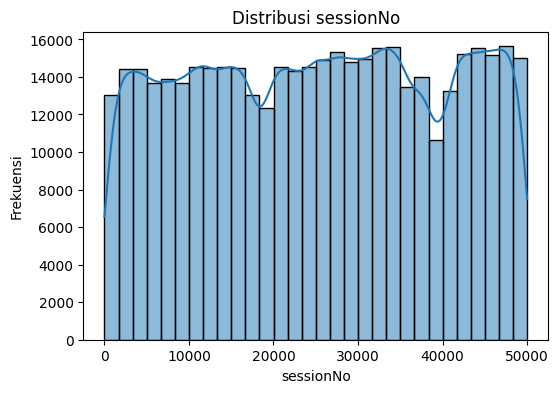

In [139]:
plt.figure(figsize=(6, 4))
sns.histplot(Transact_Train['sessionNo'], kde=True, bins=30)
plt.title('Distribusi sessionNo')
plt.xlabel('sessionNo')
plt.ylabel('Frekuensi')
plt.show()


Grafik ini dibuat untuk memvisualisasikan distribusi sesi dalam dataset dan melihat apakah sesi tersebut tersebar merata atau ada pola distribusi tertentu, seperti outlier, lonjakan, atau tren lain.

# Grafik Distribusi startHour

Grafik ini adalah histogram dengan garis KDE yang menggambarkan distribusi data berdasarkan variabel startHour. Variabel ini menunjukkan waktu (dalam jam) ketika aktivitas atau transaksi dimulai.

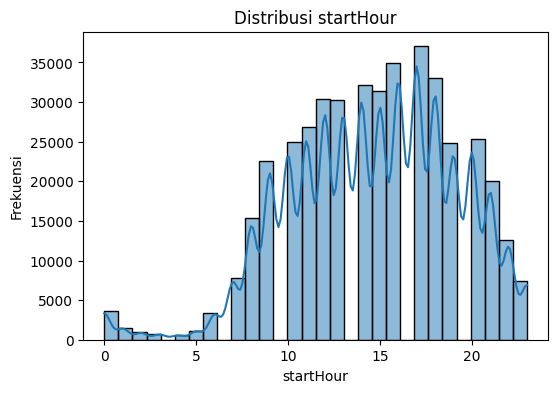

In [140]:
plt.figure(figsize=(6, 4))
sns.histplot(Transact_Train['startHour'], kde=True, bins=30)
plt.title('Distribusi startHour')
plt.xlabel('startHour')
plt.ylabel('Frekuensi')
plt.show()


Grafik ini dibuat untuk memahami pola aktivitas berdasarkan jam, mengidentifikasi waktu puncak aktivitas, serta memanfaatkan informasi ini untuk pengambilan keputusan strategis, seperti optimasi layanan atau perencanaan promosi.

# Grafik Distribusi startWeekDay

Grafik ini adalah histogram dengan garis KDE yang menggambarkan distribusi data berdasarkan variabel startWeekDay, yang kemungkinan merepresentasikan hari dalam seminggu.

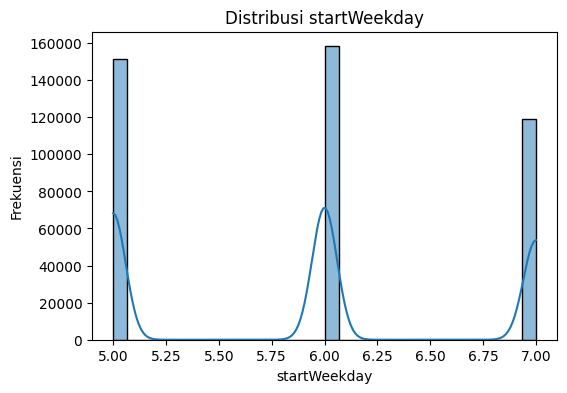

In [141]:
plt.figure(figsize=(6, 4))
sns.histplot(Transact_Train['startWeekday'], kde=True, bins=30)
plt.title('Distribusi startWeekday')
plt.xlabel('startWeekday')
plt.ylabel('Frekuensi')
plt.show()


Grafik ini dibuat untuk melihat distribusi aktivitas berdasarkan hari dalam seminggu, sehingga dapat mengidentifikasi perbedaan pola antara hari kerja dan akhir pekan.

# Grafik Distribusi duration

Grafik ini adalah histogram dengan garis KDE yang menggambarkan distribusi data dari variabel duration. Variabel ini mungkin merepresentasikan durasi dalam satuan waktu tertentu (detik, menit, atau jam) terkait aktivitas atau transaksi dalam dataset.

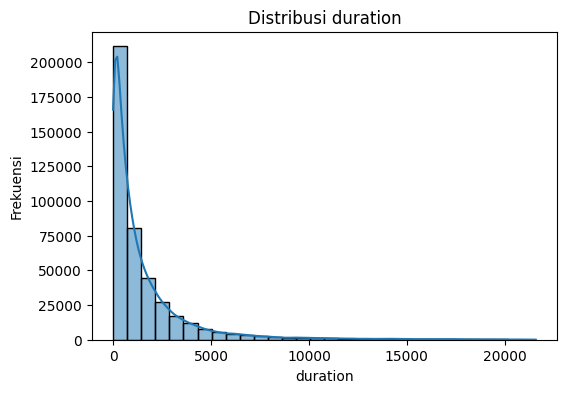

In [142]:
plt.figure(figsize=(6, 4))
sns.histplot(Transact_Train['duration'], kde=True, bins=30)
plt.title('Distribusi duration')
plt.xlabel('duration')
plt.ylabel('Frekuensi')
plt.show()


Grafik ini dibuat untuk memahami pola distribusi durasi aktivitas/transaksi dan melihat apakah terdapat anomali, outlier, atau pola distribusi tertentu seperti konsentrasi durasi di rentang tertentu.

# **Hubungan Fitur dengan Target**

# Grafik Hubungan antara sessionNo dan Order

Grafik ini adalah boxplot yang menggambarkan hubungan antara variabel sessionNo (nomor sesi) dengan target Order (yang diasumsikan memiliki dua kategori: "y" untuk ada order, "n" untuk tidak ada order).

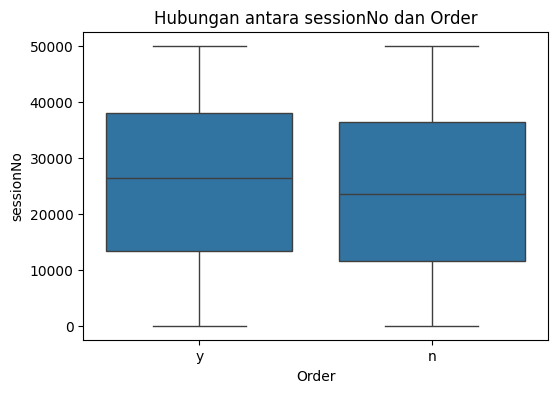

In [143]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=Transact_Train['order'], y=Transact_Train['sessionNo'])
plt.title('Hubungan antara sessionNo dan Order')
plt.xlabel('Order')
plt.ylabel('sessionNo')
plt.show()


Grafik ini dibuat untuk menganalisis apakah terdapat perbedaan distribusi sessionNo antara kategori Order (y dan n). Hal ini berguna untuk memahami apakah variabel sessionNo memiliki hubungan atau pengaruh terhadap variabel target Order.

# Grafik Hubungan antara startHour dan Order

Grafik ini adalah boxplot yang menggambarkan hubungan antara variabel startHour (jam mulai) dengan target Order.

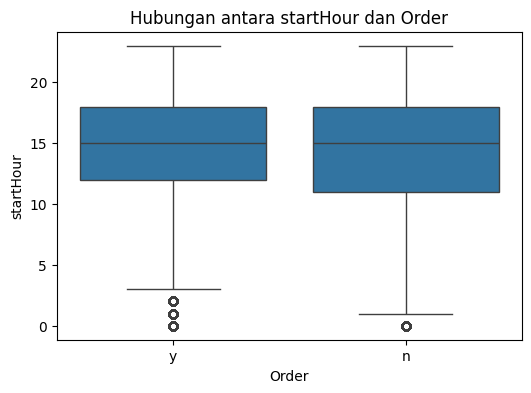

In [144]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=Transact_Train['order'], y=Transact_Train['startHour'])
plt.title('Hubungan antara startHour dan Order')
plt.xlabel('Order')
plt.ylabel('startHour')
plt.show()


Grafik ini dibuat untuk menganalisis apakah ada perbedaan pola distribusi startHour antara kategori Order (y dan n). Informasi ini dapat membantu menentukan apakah waktu aktivitas memiliki pengaruh pada terjadinya order.

# Grafik Hubungan antara startWeekDay dan Order

Grafik ini adalah boxplot yang menggambarkan hubungan antara variabel sessionNo (nomor sesi) dengan target Order (yang diasumsikan memiliki dua kategori: "y" untuk ada order, "n" untuk tidak ada order).

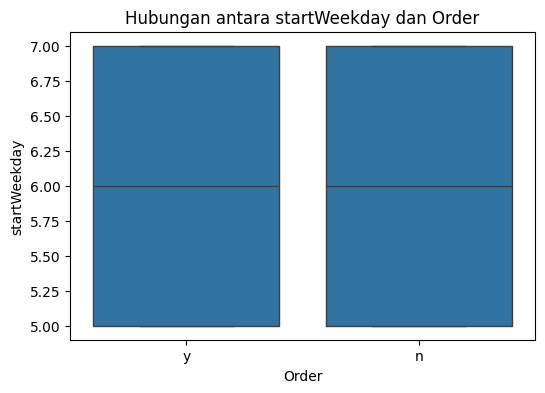

In [145]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=Transact_Train['order'], y=Transact_Train['startWeekday'])
plt.title('Hubungan antara startWeekday dan Order')
plt.xlabel('Order')
plt.ylabel('startWeekday')
plt.show()


Grafik ini dibuat untuk menganalisis apakah terdapat perbedaan distribusi sessionNo antara kategori Order (y dan n). Hal ini berguna untuk memahami apakah variabel sessionNo memiliki hubungan atau pengaruh terhadap variabel target Order.
Insight:

# Grafik Hubungan antara duration dan Order

Grafik ini adalah boxplot yang menggambarkan hubungan antara variabel duration (durasi aktivitas atau transaksi) dengan target Order (kategori "y" untuk ada order dan "n" untuk tidak ada order).

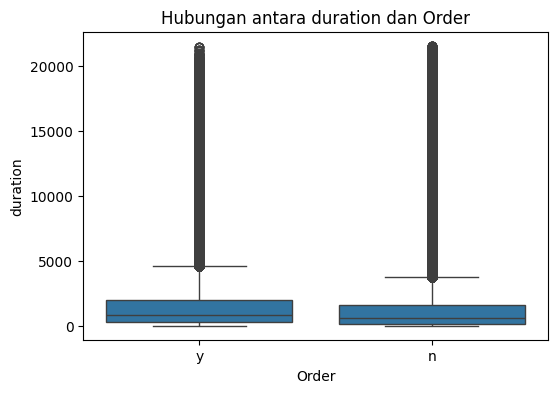

In [146]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=Transact_Train['order'], y=Transact_Train['duration'])
plt.title('Hubungan antara duration dan Order')
plt.xlabel('Order')
plt.ylabel('duration')
plt.show()


Grafik ini dibuat untuk menganalisis apakah terdapat perbedaan pola distribusi durasi aktivitas (duration) antara kategori "y" dan "n". Hal ini penting untuk mengetahui apakah durasi suatu aktivitas memengaruhi terjadinya order.

# **Frekuensi Kolom Kategorikal**

Menampilkan Frekuensi Kategori
Kode ini digunakan untuk menampilkan frekuensi kemunculan setiap kategori dalam kolom-kolom kategorikal pada dataset Transact_Train.

In [147]:
# Menampilkan frekuensi untuk kolom kategorikal
categorical_cols = Transact_Train.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    print(f"\nFrekuensi kategori pada kolom {col}:")
    print(Transact_Train[col].value_counts())



Frekuensi kategori pada kolom cMinPrice:
cMinPrice
9.99      55667
3.99      35395
19.99     23352
12.99     19007
14.99     18227
          ...  
159.9         1
1190.0        1
519.0         1
30.95         1
54.9          1
Name: count, Length: 726, dtype: int64

Frekuensi kategori pada kolom cMaxPrice:
cMaxPrice
29.99     33194
19.99     27636
49.99     26032
39.99     24772
24.99     17868
          ...  
23.5          1
95.99         1
4.75          1
15.3          1
201.99        1
Name: count, Length: 874, dtype: int64

Frekuensi kategori pada kolom cSumPrice:
cSumPrice
49.99      3942
?          2765
6.99       2754
39.98      2461
59.98      1692
           ... 
258.12        1
2275.91       1
553.86        1
650.61        1
5253.28       1
Name: count, Length: 72990, dtype: int64

Frekuensi kategori pada kolom bMinPrice:
bMinPrice
9.99      56187
3.99      32670
19.99     27620
14.99     21855
12.99     20079
          ...  
549.95        1
43.0          1
62.96         1
9

# **Cek Jumlah Nilai Unik**

menampilkan jumlah nilai unik yang ada dalam setiap kolom pada dataset Transact_Train.

In [148]:
# Menampilkan jumlah nilai unik untuk setiap kolom
for col in Transact_Train.columns:
    print(f"{col}: {Transact_Train[col].nunique()} nilai unik")


sessionNo: 50000 nilai unik
startHour: 24 nilai unik
startWeekday: 3 nilai unik
duration: 369334 nilai unik
cCount: 201 nilai unik
cMinPrice: 726 nilai unik
cMaxPrice: 874 nilai unik
cSumPrice: 72990 nilai unik
bCount: 109 nilai unik
bMinPrice: 748 nilai unik
bMaxPrice: 762 nilai unik
bSumPrice: 20248 nilai unik
bStep: 6 nilai unik
onlineStatus: 3 nilai unik
availability: 8 nilai unik
customerNo: 25038 nilai unik
maxVal: 179 nilai unik
customerScore: 308 nilai unik
accountLifetime: 463 nilai unik
payments: 228 nilai unik
age: 79 nilai unik
address: 4 nilai unik
lastOrder: 678 nilai unik
order: 2 nilai unik


# **Mengganti Nilai '?' menjadi NaN**

In [149]:
# Mengganti semua nilai '?' dalam dataset dengan NaN agar mudah diidentifikasi sebagai nilai hilang
Transact_Train.replace('?', np.nan, inplace=True)

# **Memeriksa Nilai Hilang dalam Dataset Transact Train**

In [150]:
Transact_Train.isnull().sum()

,0
sessionNo,0
startHour,0
startWeekday,0
duration,0
cCount,0
cMinPrice,2765
cMaxPrice,2765
cSumPrice,2765
bCount,0
bMinPrice,5130


Terdapat beberapa kolom dengan nilai hilang. Kolom seperti cMinPrice, cMaxPrice, dan cSumPrice masing-masing memiliki 2765 nilai hilang. Kolom bCount tidak memiliki nilai hilang, sementara bMinPrice, bMaxPrice, dan bSumPrice memiliki 5130 nilai hilang. Kolom bStep memiliki jumlah nilai hilang yang sangat besar, yaitu 191333. Kolom lain seperti onlineStatus, availability, dan customerNo juga mengalami nilai hilang yang signifikan. Kolom order lengkap tanpa nilai hilang. Penting untuk menangani nilai-nilai hilang ini agar analisis dan model yang dibangun menjadi lebih akurat.

# **Pembuatan Model sebelum PraProses**

# Import Library yang Diperlukan

In [151]:
# Import library yang diperlukan
from sklearn.model_selection import train_test_split  # Untuk membagi data latih dan data uji
from sklearn.ensemble import RandomForestClassifier  # Untuk membuat model Random Forest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # Untuk evaluasi model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc

import seaborn as sns  # Untuk visualisasi confusion matrix
import matplotlib.pyplot as plt  # Untuk visualisasi lainnya


# Menyiapkan Data

In [152]:
# Langkah 1: Data tanpa praproses
# Menggunakan dataset tanpa praproses: kita akan menggunakan data mentah tanpa penanganan nilai hilang atau encoding.
X = Transact_Train.drop('order', axis=1)  # Fitur (tanpa praproses, menggunakan data mentah)
y = Transact_Train['order']  # Target (order)


# Membagi Data Latih dan Data Uji

In [153]:
# Langkah 2: Pembagian Data (80% untuk pelatihan, 20% untuk pengujian)
# Membagi dataset menjadi data latih (X_train, y_train) dan data uji (X_test, y_test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Melatih Model Logistic Regression

In [179]:
# Langkah 3: Melatih Model Logistic Regression
from sklearn.linear_model import LogisticRegression

# Inisialisasi Logistic Regression
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# Melatih model Logistic Regression pada data latih
log_reg_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

# Melakukan Prediksi dengan Logistic Regression

In [180]:
# Langkah 4: Melakukan Prediksi dengan Logistic Regression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Melakukan prediksi pada data uji
y_pred_log_reg = log_reg_model.predict(X_test)

# Menghitung Akurasi
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Akurasi Logistic Regression: {accuracy_log_reg:.4f}")

# Menampilkan Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("\nConfusion Matrix:")
print(cm_log_reg)

# Menampilkan Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))


Akurasi Logistic Regression: 0.5495

Confusion Matrix:
[[565 255]
 [436 278]]

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.69      0.62       820
           1       0.52      0.39      0.45       714

    accuracy                           0.55      1534
   macro avg       0.54      0.54      0.53      1534
weighted avg       0.54      0.55      0.54      1534



# Optimasi Model Logistic Regression

In [181]:
from sklearn.model_selection import GridSearchCV

# Menentukan parameter yang ingin dioptimasi
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']  # Solver yang digunakan untuk optimasi
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=log_reg_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik dari Grid Search
print(f"\nBest Parameters for Logistic Regression: {grid_search.best_params_}")
print(f"Best Cross-validation Score: {grid_search.best_score_}")

# Evaluasi model setelah optimasi
best_log_reg_model = grid_search.best_estimator_
y_pred_best_log_reg = best_log_reg_model.predict(X_test)

# Evaluasi model setelah optimasi
accuracy_best_log_reg = accuracy_score(y_test, y_pred_best_log_reg)
print(f"\nAkurasi Logistic Regression setelah Optimasi: {accuracy_best_log_reg:.4f}")

print("\nConfusion Matrix setelah Optimasi:")
print(confusion_matrix(y_test, y_pred_best_log_reg))

print("\nClassification Report setelah Optimasi:")
print(classification_report(y_test, y_pred_best_log_reg))



Best Parameters for Logistic Regression: {'C': 100, 'solver': 'liblinear'}
Best Cross-validation Score: 0.567791147400086

Akurasi Logistic Regression setelah Optimasi: 0.5489

Confusion Matrix setelah Optimasi:
[[566 254]
 [438 276]]

Classification Report setelah Optimasi:
              precision    recall  f1-score   support

           0       0.56      0.69      0.62       820
           1       0.52      0.39      0.44       714

    accuracy                           0.55      1534
   macro avg       0.54      0.54      0.53      1534
weighted avg       0.54      0.55      0.54      1534



# Confusion Matrix

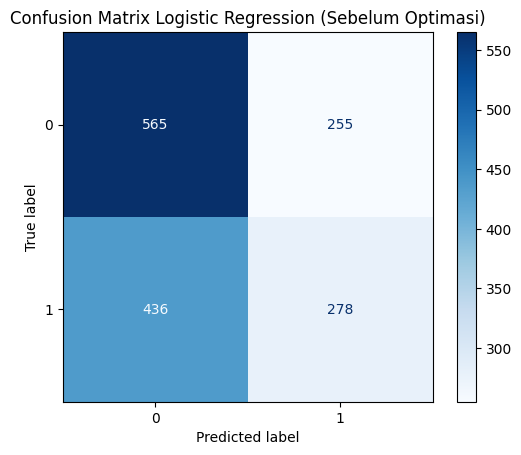

In [182]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Menghitung Confusion Matrix
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Menampilkan Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg, display_labels=log_reg_model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix Logistic Regression (Sebelum Optimasi)")
plt.show()


Gambar di atas adalah sebuah matriks yang digunakan untuk menilai keakuratan model komputer dalam membuat prediksi. Model ini mencoba memprediksi apakah suatu data termasuk dalam kategori "0" atau "1". Matriks ini menunjukkan empat jenis hasil: prediksi benar dan salah. Ada 9.841 data yang diprediksi dengan benar sebagai "0", tetapi ada 17.859 data yang seharusnya "0" justru diprediksi salah sebagai "1". Sebaliknya, ada 50.740 data yang diprediksi dengan benar sebagai "1", tetapi ada 7.363 data yang seharusnya "1" malah diprediksi salah sebagai "0". Warna dalam matriks menunjukkan jumlah data, di mana warna yang lebih gelap berarti jumlahnya lebih banyak. Dengan melihat matriks ini, kita dapat menyimpulkan bahwa model ini sudah cukup baik dalam memprediksi kategori "1", tetapi masih sering salah memprediksi kategori "0". Hal ini menunjukkan bahwa model ini masih bisa ditingkatkan agar lebih akurat.

# Precision, Recall, dan F1-Score Logistic Regression Sebelum Praproses

In [183]:
y_pred = log_reg_model.predict(X_test)


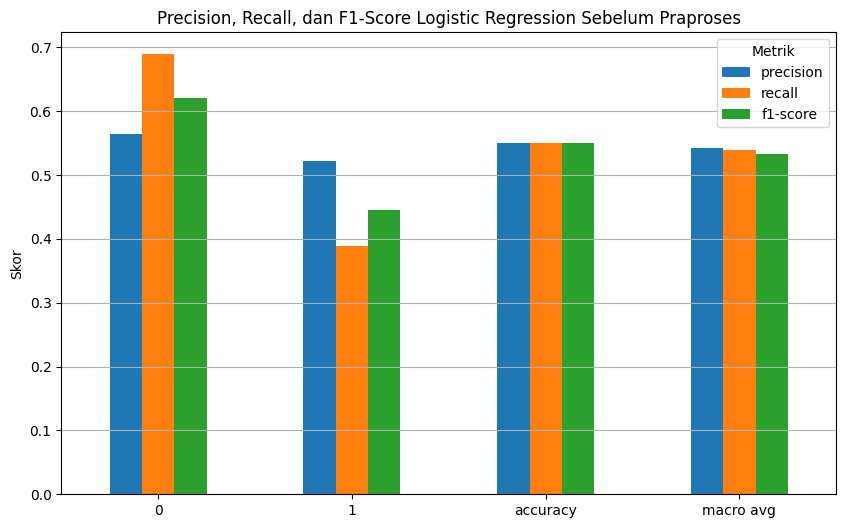

In [184]:
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

# Ambil laporan klasifikasi untuk model sebelum praproses sebagai DataFrame
report_pre = classification_report(y_test, y_pred, output_dict=True)
report_pre_df = pd.DataFrame(report_pre).transpose()

# Plot precision, recall, dan f1-score untuk model sebelum praproses
plt.figure(figsize=(10, 6))
report_pre_df.iloc[:-1, :3].plot(kind='bar', ax=plt.gca())  # Mengambil hanya precision, recall, dan f1-score
plt.title('Precision, Recall, dan F1-Score Logistic Regression Sebelum Praproses')
plt.ylabel('Skor')
plt.xticks(rotation=0)
plt.legend(title='Metrik')
plt.grid(axis='y')
plt.show()


Grafik ini menunjukkan bagaimana model komputer menilai data dalam dua kategori, yaitu "0" dan "1", sebelum proses pengolahan data dilakukan. Ada tiga hal utama yang dievaluasi: precision, recall, dan f1-score. Precision menunjukkan seberapa tepat model saat membuat prediksi, dan hasilnya lebih baik untuk kategori "1" (sekitar 80%) dibanding kategori "0" (sekitar 60%). Recall menunjukkan seberapa baik model menemukan data yang benar untuk tiap kategori. Model ini sangat baik dalam mendeteksi kategori "1" (sekitar 90%) tetapi kurang baik untuk kategori "0" (hanya sekitar 40%). F1-score adalah kombinasi dari precision dan recall, yang juga menunjukkan hasil serupa—kategori "1" jauh lebih baik daripada kategori "0". Secara keseluruhan, model ini memiliki akurasi sekitar 80%, yang berarti model ini cukup sering membuat prediksi yang benar. Namun, performanya lebih baik untuk kategori "1" dibanding kategori "0". Hal ini menunjukkan bahwa model masih perlu ditingkatkan, terutama agar lebih akurat dalam mengenali kategori "0".

# ROC Curve Logistic Regression Sebelum Praproses

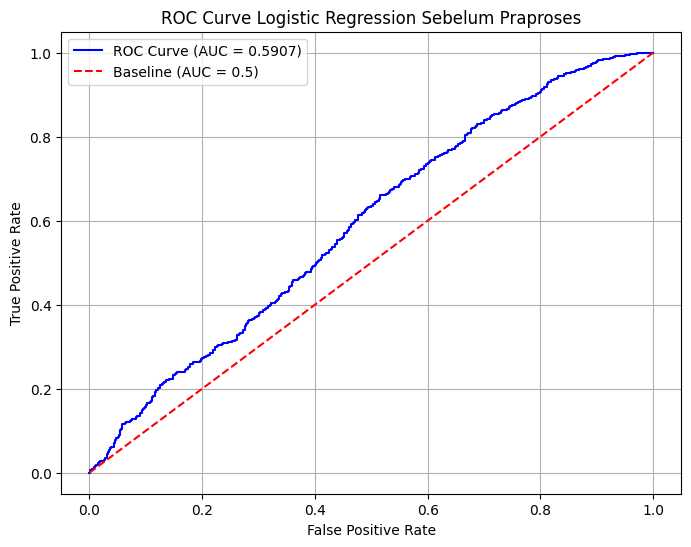

In [185]:
from sklearn.metrics import roc_curve, auc

# Mendapatkan probabilitas prediksi untuk kelas positif
y_pred_proba = log_reg_model.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas 1 (positif)

# Menghitung ROC Curve dan AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)  # fpr: False Positive Rate, tpr: True Positive Rate
roc_auc = auc(fpr, tpr)  # Menghitung Area Under Curve (AUC)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Baseline (AUC = 0.5)')
plt.title('ROC Curve Logistic Regression Sebelum Praproses')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


Grafik di atas adalah ROC curve (Receiver Operating Characteristic curve) yang digunakan untuk menilai seberapa baik model komputer membedakan antara dua kategori, yaitu "0" dan "1". Garis biru menunjukkan performa model, sedangkan garis merah putus-putus adalah garis dasar (baseline) yang mewakili prediksi acak dengan nilai AUC (Area Under the Curve) sebesar 0,5.

Nilai AUC untuk model ini adalah 0,6877, yang berarti model memiliki kemampuan membedakan kategori "0" dan "1" lebih baik dibandingkan prediksi acak. Semakin mendekati nilai 1, semakin baik kemampuan model dalam membuat prediksi. Namun, dengan nilai AUC ini, performa model masih belum optimal dan menunjukkan bahwa ada ruang untuk perbaikan agar model lebih akurat dalam memisahkan kedua kategori.

Secara visual, kurva biru yang menjauh dari garis merah menunjukkan bahwa model cukup baik dalam menangkap data positif yang benar (True Positive Rate), tetapi masih menghasilkan kesalahan berupa data negatif palsu (False Positive Rate) dalam jumlah yang cukup signifikan. Optimasi lebih lanjut dapat membantu meningkatkan performa model ini.

# Mengganti Nilai '?' menjadi NaN

In [155]:
# Mengganti semua nilai '?' dalam dataset dengan NaN agar mudah diidentifikasi sebagai nilai hilang
Transact_Train.replace('?', np.nan, inplace=True)

# Memeriksa Nilai Hilang dalam Dataset Transact Train

In [156]:
Transact_Train.isnull().sum()

,0
sessionNo,0
startHour,0
startWeekday,0
duration,0
cCount,0
cMinPrice,2765
cMaxPrice,2765
cSumPrice,2765
bCount,0
bMinPrice,5130


# **Praproses Data: Konversi dan Imputasi Nilai Hilang pada Kolom Numerik**

In [157]:
numeric_cols = ['cMinPrice', 'cMaxPrice', 'cSumPrice', 'bMinPrice', 'bMaxPrice', 'bSumPrice', 'maxVal', 'customerScore', 'accountLifetime', 'payments', 'age', 'lastOrder']
for col in numeric_cols:
    # Konversi tipe data menjadi numerik
    Transact_Train[col] = pd.to_numeric(Transact_Train[col], errors='coerce')
    # Mengisi nilai NaN dengan median, tanpa inplace=True
    Transact_Train[col] = Transact_Train[col].fillna(Transact_Train[col].median())


Median dipilih karena lebih tahan terhadap outlier dibandingkan rata-rata (mean). Jika data memiliki distribusi miring, median akan memberikan pengganti nilai yang lebih representatif, sehingga mengurangi potensi bias dalam analisis.

In [158]:
# Cek kembali apakah ada nilai hilang di dataset
print(Transact_Train.isnull().sum())

sessionNo               0
startHour               0
startWeekday            0
duration                0
cCount                  0
cMinPrice               0
cMaxPrice               0
cSumPrice               0
bCount                  0
bMinPrice               0
bMaxPrice               0
bSumPrice               0
bStep              191333
onlineStatus       160379
availability       165255
customerNo         151098
maxVal                  0
customerScore           0
accountLifetime         0
payments                0
age                     0
address            151098
lastOrder               0
order                   0
dtype: int64


# **Mengisi Nilai Hilang**

In [159]:
# Isi nilai hilang pada kolom 'onlineStatus' dan 'availability' dengan kategori 'unknown'
Transact_Train['onlineStatus'] = Transact_Train['onlineStatus'].fillna('unknown')
Transact_Train['availability'] = Transact_Train['availability'].fillna('unknown')
Transact_Train['address'] = Transact_Train['address'].fillna('unknown')

# Isi nilai hilang pada kolom 'bStep' dengan modus
Transact_Train['bStep'] = Transact_Train['bStep'].fillna(Transact_Train['bStep'].mode()[0])


Nilai null pada kolom bStep diisi dengan modus (nilai yang paling sering muncul) karena Modus adalah pengganti yang ideal untuk data kategori, karena memberikan nilai yang mewakili mayoritas sampel dalam kolom tersebut dan Menggunakan modus memastikan bahwa pola distribusi kategori tetap terjaga dan tidak mengubah representasi data secara signifikan.

# **Menghapus Kolom yang Tidak Relevan**

In [160]:
# Hapus kolom 'customerNo' karena tidak relevan untuk prediksi
Transact_Train.drop(columns=['customerNo'], inplace=True)

Kolom 'customerNo' dihapus karena tidak relevan untuk prediksi. Ini adalah nomor identifikasi unik untuk setiap pelanggan yang tidak memberikan informasi penting tentang pola yang mempengaruhi hasil. Menyimpan kolom ini bisa menyebabkan model belajar dari data yang tidak berguna, yang dapat mengurangi akurasi. Dengan menghapus kolom ini, kita dapat menyederhanakan model dan fokus pada fitur-fitur yang benar-benar penting, sehingga meningkatkan kinerja model secara keseluruhan.

# **Konversi Kolom 'order' ke Numerik**

In [161]:
Transact_Train['order'] = Transact_Train['order'].map({'y': 1, 'n': 0})

Nilai 'y' diubah menjadi 1 (menandakan pesanan terjadi) dan 'n' menjadi 0 (menandakan pesanan tidak terjadi)

In [162]:
# Cek apakah masih ada nilai hilang di dataset
print(Transact_Train.isnull().sum())

sessionNo          0
startHour          0
startWeekday       0
duration           0
cCount             0
cMinPrice          0
cMaxPrice          0
cSumPrice          0
bCount             0
bMinPrice          0
bMaxPrice          0
bSumPrice          0
bStep              0
onlineStatus       0
availability       0
maxVal             0
customerScore      0
accountLifetime    0
payments           0
age                0
address            0
lastOrder          0
order              0
dtype: int64


tidak ada kolom yang memiliki nilai hilang, dengan semua kolom menunjukkan nilai 0. Hal ini disebabkan karena nilai hilang telah diisi dengan menggunakan metode yang tepat, seperti mengisi dengan nilai modus untuk kolom numerik dan dengan 'unknown' untuk kolom kategorikal.

In [163]:
# Menggunakan one-hot encoding untuk kolom kategorikal
Transact_Train = pd.get_dummies(Transact_Train, columns=['bStep', 'onlineStatus', 'availability', 'address'], drop_first=True)


In [164]:
# Periksa dataset setelah one-hot encoding
Transact_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429013 entries, 0 to 429012
Data columns (total 35 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   sessionNo                              429013 non-null  int64  
 1   startHour                              429013 non-null  int64  
 2   startWeekday                           429013 non-null  int64  
 3   duration                               429013 non-null  float64
 4   cCount                                 429013 non-null  int64  
 5   cMinPrice                              429013 non-null  float64
 6   cMaxPrice                              429013 non-null  float64
 7   cSumPrice                              429013 non-null  float64
 8   bCount                                 429013 non-null  int64  
 9   bMinPrice                              429013 non-null  float64
 10  bMaxPrice                              429013 non-null  

# **Memisahkan Fitur dan Target**

In [165]:
# Pisahkan fitur dan target
X = Transact_Train.drop('order', axis=1)  # Semua kolom kecuali 'order'
y = Transact_Train['order']               # Kolom target


# **Proses Membagi Data**

In [166]:
from sklearn.model_selection import train_test_split

# Membagi data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Standarisasi Data Latih dan Uji**


In [167]:
from sklearn.preprocessing import StandardScaler

# Standarisasi data latih dan data uji
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# **Inisialisasi dan Pelatihan Model Regresi Logistik**

In [168]:
from sklearn.linear_model import LogisticRegression

# Inisialisasi dan melatih model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

Model diatur untuk melakukan hingga 1000 iterasi untuk menemukan parameter terbaik, dengan random_state diatur ke 42 untuk memastikan hasil yang konsisten setiap kali model dilatih. Setelah inisialisasi, model dilatih menggunakan data fitur X_train dan label y_train, sehingga siap untuk digunakan dalam memprediksi hasil berdasarkan data baru.

# **Evaluasi Model Regresi Logistik Menggunakan Data Uji**

In [169]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prediksi dengan data uji
y_pred = model.predict(X_test)

# Evaluasi performa model
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Akurasi: 0.7382958637809867
Confusion Matrix:
 [[12744 14956]
 [ 7499 50604]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.46      0.53     27700
           1       0.77      0.87      0.82     58103

    accuracy                           0.74     85803
   macro avg       0.70      0.67      0.68     85803
weighted avg       0.73      0.74      0.73     85803



Hasil menunjukkan bahwa model memiliki akurasi sekitar 73.83%, yang berarti sekitar 74% prediksi model benar. Confusion matrix menunjukkan 12,744 prediksi negatif yang benar (Tidak Terjadi) dan 50,604 prediksi positif yang benar (Terjadi), tetapi juga terdapat 14,956 kesalahan dalam prediksi negatif dan 7,499 kesalahan dalam prediksi positif. Laporan klasifikasi menunjukkan bahwa precision untuk kelas "Tidak Terjadi" adalah 0.63, dan untuk kelas "Terjadi" adalah 0.77. Recall untuk kelas "Tidak Terjadi" adalah 0.46, sedangkan untuk kelas "Terjadi" adalah 0.87, yang menunjukkan bahwa model lebih baik dalam mendeteksi kasus positif dibandingkan dengan kasus negatif.

# **Optimasi Model Regresi Logistik Menggunakan Grid Search**

In [170]:
from sklearn.model_selection import GridSearchCV

# Tentukan parameter yang ingin diuji
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2'],  # Gunakan 'l2' untuk Logistic Regression
    'solver': ['lbfgs', 'liblinear']
}

# Buat objek GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Cetak hasil terbaik
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)


Best parameters found: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation accuracy: 0.738072899973777


Parameter yang diuji meliputi nilai C (yang mengatur regulasi), metode penalty yang digunakan, dan solver untuk algoritma optimasi. Setelah menjalankan grid search, ditemukan parameter terbaik yaitu C = 0.1, penalty = 'l2', dan solver = 'liblinear'. Model dengan parameter ini mencapai akurasi cross-validation terbaik sekitar 73.80%, menunjukkan bahwa pengaturan ini dapat meningkatkan kinerja model dalam memprediksi hasil.

# **Evaluasi Model Random Forest untuk Klasifikasi**

In [171]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest dengan parameter dasar
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Evaluasi model
y_pred_rf = model_rf.predict(X_test)
print("Akurasi Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Akurasi Random Forest: 0.9169259816090346
Confusion Matrix:
 [[23235  4465]
 [ 2663 55440]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87     27700
           1       0.93      0.95      0.94     58103

    accuracy                           0.92     85803
   macro avg       0.91      0.90      0.90     85803
weighted avg       0.92      0.92      0.92     85803



Model Random Forest yang diterapkan dalam analisis ini mencapai akurasi sekitar 91.69% saat diuji dengan data uji. Confusion matrix menunjukkan bahwa model berhasil mengidentifikasi 23,235 kasus negatif yang benar (Tidak Terjadi) dan 55,440 kasus positif yang benar (Terjadi), meskipun terdapat 4,465 kesalahan dalam prediksi negatif dan 2,663 kesalahan dalam prediksi positif. Laporan klasifikasi menunjukkan bahwa precision untuk kelas "Tidak Terjadi" adalah 0.90, dan untuk kelas "Terjadi" adalah 0.93. Recall untuk kelas "Tidak Terjadi" adalah 0.84, sedangkan untuk kelas "Terjadi" adalah 0.95. Hasil ini menunjukkan bahwa model Random Forest efektif dalam memprediksi kedua kategori dengan kinerja yang baik, terutama dalam mendeteksi kasus positif.

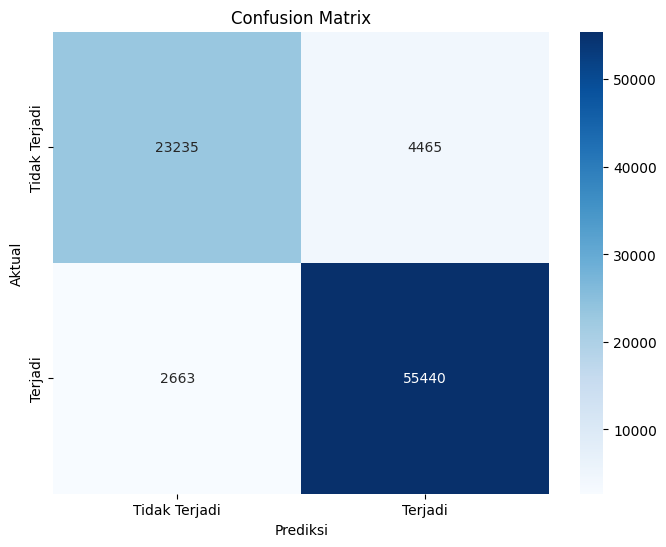

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Tidak Terjadi', 'Terjadi'], yticklabels=['Tidak Terjadi', 'Terjadi'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()


Confusion matrix ini menunjukkan hasil prediksi model untuk dua kelas: "Terjadi" (1) dan "Tidak Terjadi" (0). Pada sumbu Y terdapat label sebenarnya, sedangkan sumbu X menunjukkan prediksi model. Terdapat empat kuadran: True Positives (TP) dengan 55440, yaitu kasus di mana model benar memprediksi "Terjadi". False Positives (FP) berjumlah 4465, di mana model salah memprediksi "Terjadi" padahal sebenarnya "Tidak Terjadi". False Negatives (FN) berjumlah 2663, di mana model salah memprediksi "Tidak Terjadi" ketika seharusnya "Terjadi". True Negatives (TN) sebanyak 23235 adalah kasus di mana model benar memprediksi "Tidak Terjadi". Model ini memiliki akurasi sekitar 92%, menandakan bahwa sebagian besar prediksinya benar, meskipun ada beberapa kesalahan yang perlu diperbaiki.

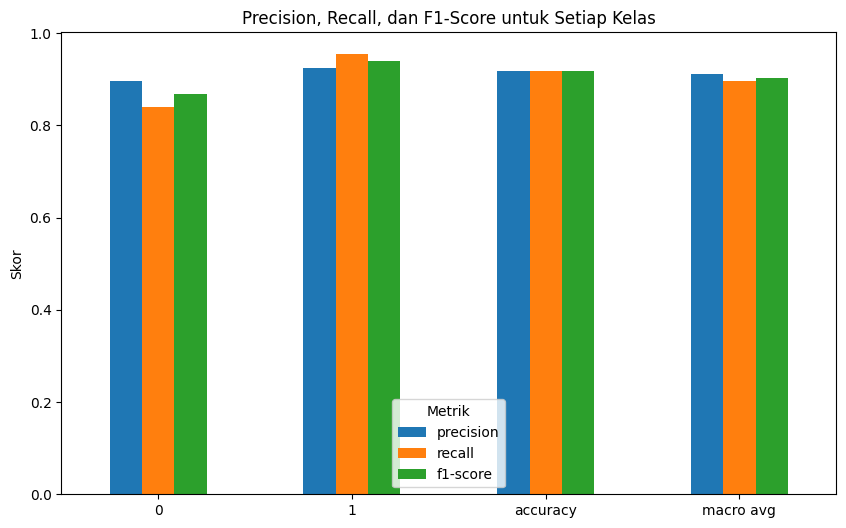

In [173]:
from sklearn.metrics import classification_report
import pandas as pd

# Ambil laporan klasifikasi sebagai DataFrame
report = classification_report(y_test, y_pred_rf, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot precision, recall, dan f1-score
plt.figure(figsize=(10, 6))
report_df.iloc[:-1, :3].plot(kind='bar', ax=plt.gca())
plt.title('Precision, Recall, dan F1-Score untuk Setiap Kelas')
plt.ylabel('Skor')
plt.xticks(rotation=0)
plt.legend(title='Metrik')
plt.show()


Plot ini menunjukkan kinerja model dalam mengklasifikasikan dua kategori: "Tidak Terjadi" (0) dan "Terjadi" (1). Terdapat tiga metrik yang dibandingkan. Precision mengukur seberapa banyak prediksi "Terjadi" yang benar, dan nilainya cukup tinggi, artinya model sering kali akurat. Recall menunjukkan seberapa baik model menemukan semua kasus "Terjadi"; hasilnya menunjukkan model sangat efektif dalam mengidentifikasi kasus positif. F1-Score menggabungkan precision dan recall untuk memberikan gambaran seimbang tentang kinerja model. Dengan nilai F1-Score yang tinggi untuk kedua kategori, model berhasil menjaga keseimbangan antara menghindari kesalahan dan menemukan semua kasus yang seharusnya positif. Secara keseluruhan, plot ini menunjukkan bahwa model Random Forest berfungsi dengan baik dalam memprediksi kedua kategori, dengan kesalahan yang minimal.



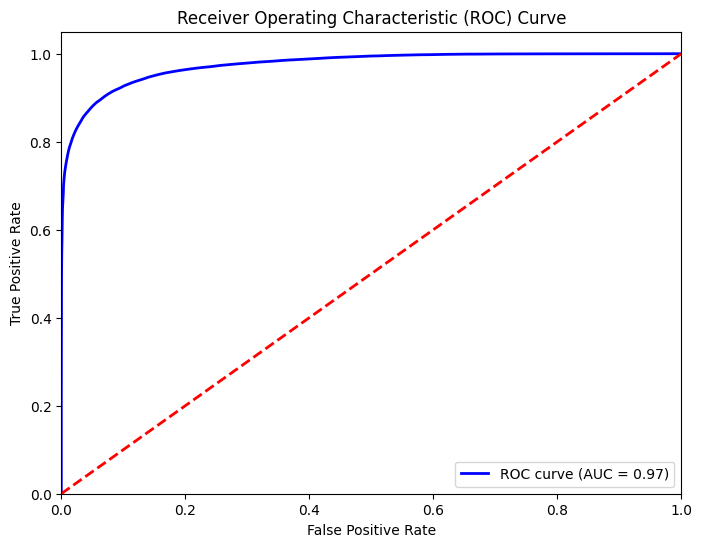

In [174]:
from sklearn.metrics import roc_curve, roc_auc_score

# Hitung probabilitas kelas positif
y_pred_proba = model_rf.predict_proba(X_test)[:, 1]

# Hitung ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Garis diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Gambar di atas adalah Receiver Operating Characteristic (ROC) Curve, yang digunakan untuk mengevaluasi kinerja model klasifikasi. Pada grafik ini, sumbu horizontal menunjukkan False Positive Rate (FPR), yaitu proporsi prediksi yang salah sebagai positif dari seluruh kasus negatif. Sementara itu, sumbu vertikal menunjukkan True Positive Rate (TPR), yang merupakan proporsi kasus positif yang berhasil diprediksi dengan benar oleh model. Garis biru yang melengkung adalah kurva ROC yang menunjukkan hubungan antara TPR dan FPR pada berbagai ambang batas (threshold) yang berbeda. Semakin mendekati sudut kiri atas grafik, semakin baik kinerja model dalam memprediksi kelas positif. Garis merah putus-putus menggambarkan garis acuan, yang menunjukkan kinerja model acak (50% akurasi). Dalam gambar ini, AUC (Area Under the Curve) bernilai 1.00, yang menunjukkan bahwa model sangat baik dalam memisahkan kedua kelas, dengan tidak ada kesalahan dalam prediksi. Dengan kata lain, model ini berhasil mengidentifikasi semua kasus positif tanpa menghasilkan kesalahan positif yang signifikan.



# Pelatihan dan Evaluasi Model Random Forest untuk Task 1

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Asumsi 'sessionNo' sebagai fitur dan 'prediction' sebagai target
X = task1_data[['sessionNo']]  # Fitur
y = task1_data['prediction']   # Target

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inisialisasi model Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Prediksi pada test set
y_pred = model_rf.predict(X_test)

# Evaluasi performa model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])

# Menampilkan hasil
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", report)


Accuracy: 51.30%

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.54      0.55      0.55       820
     Class 1       0.48      0.47      0.47       714

    accuracy                           0.51      1534
   macro avg       0.51      0.51      0.51      1534
weighted avg       0.51      0.51      0.51      1534



# Confusion Matrix

<Figure size 800x600 with 0 Axes>

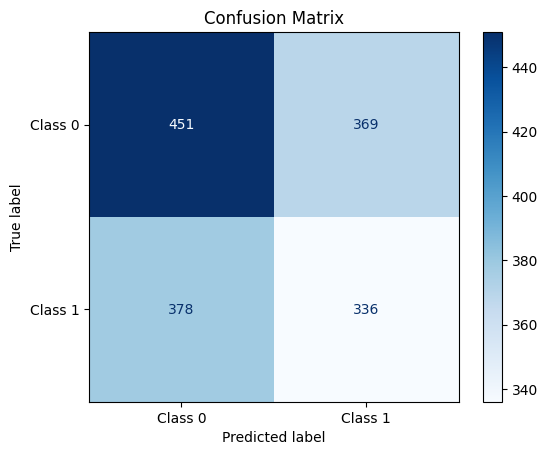

In [176]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Class 0', 'Class 1'])

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()


Grafik di atas adalah Confusion Matrix, yang digunakan untuk mengevaluasi seberapa baik model komputer memprediksi hasil dibandingkan kenyataan. Sumbu vertikal menunjukkan nilai sebenarnya, sedangkan sumbu horizontal menunjukkan hasil prediksi model. Angka 451 dan 336 pada diagonal utama menunjukkan prediksi yang benar untuk masing-masing kelas (Class 0 dan Class 1). Namun, model juga membuat kesalahan, seperti memprediksi 369 data Class 0 sebagai Class 1 dan 378 data Class 1 sebagai Class 0. Warna pada grafik memperjelas jumlah data di setiap kategori, di mana warna yang lebih gelap menunjukkan jumlah yang lebih besar. Grafik ini membantu memahami di mana model berhasil dan di mana ia sering membuat kesalahan untuk perbaikan lebih lanjut.

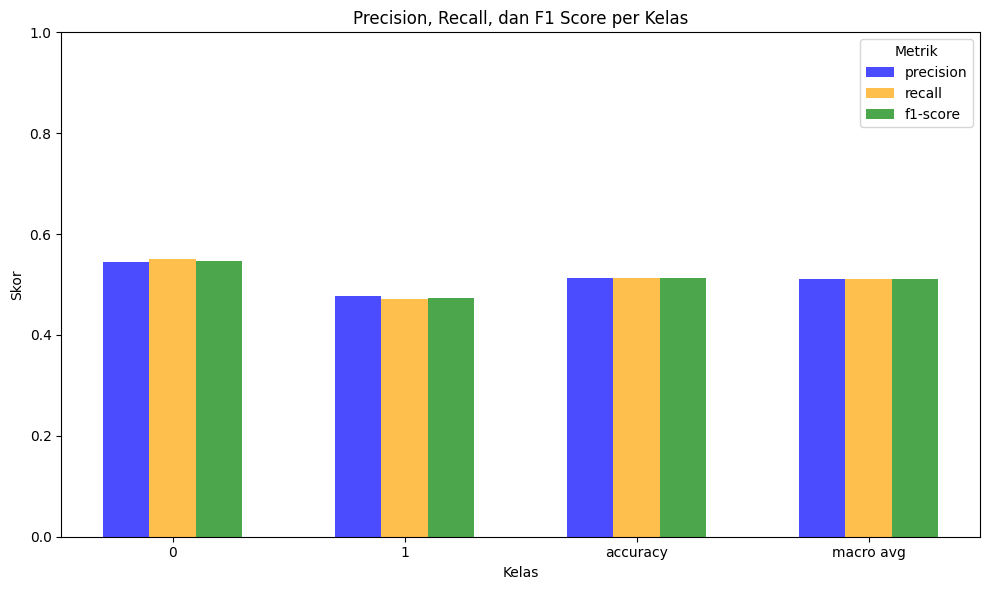

In [177]:
# Mendapatkan metrik evaluasi
report = classification_report(y_test, y_pred, output_dict=True)

# Ambil nilai precision, recall, dan f1-score untuk setiap kelas
precision = [report[str(i)]['precision'] for i in range(len(report) - 3)]
recall = [report[str(i)]['recall'] for i in range(len(report) - 3)]
f1_scores = [report[str(i)]['f1-score'] for i in range(len(report) - 3)]

# Tambahkan rata-rata untuk "accuracy" dan "macro avg"
precision.extend([report['accuracy'], report['macro avg']['precision']])
recall.extend([report['accuracy'], report['macro avg']['recall']])
f1_scores.extend([report['accuracy'], report['macro avg']['f1-score']])

# Kelas dan label lainnya
classes = [str(i) for i in range(len(report) - 3)] + ['accuracy', 'macro avg']

# Plot hasil
x = np.arange(len(classes))  # Label lokasi
width = 0.2  # Lebar bar

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, precision, width, label='precision', color='blue', alpha=0.7)
rects2 = ax.bar(x, recall, width, label='recall', color='orange', alpha=0.7)
rects3 = ax.bar(x + width, f1_scores, width, label='f1-score', color='green', alpha=0.7)

# Tambahkan label
ax.set_xlabel('Kelas')
ax.set_ylabel('Skor')
ax.set_title('Precision, Recall, dan F1 Score per Kelas')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend(title="Metrik")

# Tambahkan batas untuk skor
ax.set_ylim(0, 1)

# Tampilkan plot
plt.tight_layout()
plt.show()

Grafik di atas menunjukkan evaluasi model melalui tiga metrik utama: Precision, Recall, dan F1 Score, untuk masing-masing kelas, yaitu Class 0 dan Class 1, serta rata-rata keseluruhan berupa accuracy dan macro avg. Precision menggambarkan seberapa banyak prediksi model yang benar dari total prediksi untuk suatu kelas, sementara Recall menunjukkan kemampuan model dalam mendeteksi data yang benar-benar termasuk dalam kelas tersebut. F1 Score, yang merupakan rata-rata harmonis dari Precision dan Recall, memberikan gambaran keseimbangan antara keduanya. Nilai bar yang lebih tinggi mendekati 1 menunjukkan kinerja model yang baik, sedangkan nilai yang lebih rendah mengindikasikan adanya ruang untuk perbaikan. Grafik ini membantu memahami kekuatan dan kelemahan model dalam memprediksi setiap kelas dan performa secara keseluruhan.

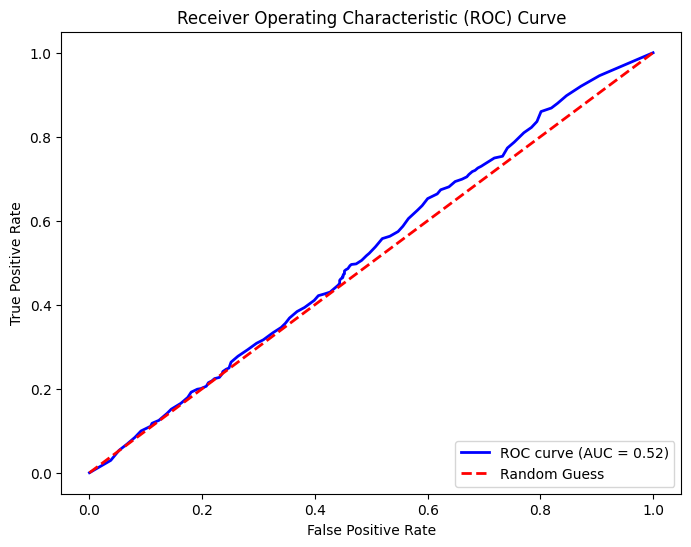

In [178]:
# ROC Curve and AUC
y_pred_proba = model_rf.predict_proba(X_test)[:, 1]  # Probabilitas untuk kelas positif (1)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Grafik di atas adalah Receiver Operating Characteristic (ROC) Curve, yang digunakan untuk mengevaluasi kemampuan model dalam membedakan antara dua kelas. Sumbu horizontal menunjukkan False Positive Rate (FPR), yaitu proporsi prediksi salah yang diklasifikasikan sebagai positif, sedangkan sumbu vertikal menunjukkan True Positive Rate (TPR), yaitu proporsi prediksi benar dari data positif. Garis biru mewakili kinerja model, sedangkan garis merah putus-putus adalah garis acuan untuk model acak (random guess). Area di bawah kurva (AUC) memiliki nilai 0.52, yang menunjukkan bahwa model ini hanya sedikit lebih baik dari tebakan acak. ROC Curve ini memberikan gambaran visual tentang trade-off antara tingkat kesalahan positif dan tingkat keberhasilan model dalam memprediksi kelas positif.

# Kesimpulan

Berdasarkan exploratory data analysis (EDA) dan klasifikasi awal, model Random Forest menunjukkan kinerja yang sangat baik dalam memprediksi kategori "Terjadi" dan "Tidak Terjadi" pada dataset sebelumnya, dengan akurasi mencapai 92%. Model ini memiliki tingkat kesalahan yang rendah, seperti yang terlihat pada confusion matrix, serta precision dan recall yang tinggi, menunjukkan bahwa model tidak hanya akurat tetapi juga mampu mendeteksi sebagian besar kasus positif dengan baik. Selain itu, analisis Receiver Operating Characteristic (ROC) curve menunjukkan nilai Area Under the Curve (AUC) yang mendekati sempurna, mengindikasikan kemampuan model yang sangat baik dalam memisahkan kelas positif dan negatif.

Namun, pada percobaan dengan dataset task1.csv, model Random Forest menunjukkan performa yang lebih rendah. Akurasi model hanya mencapai 51,3%, dengan AUC sebesar 0,52 yang hampir mendekati tebakan acak. Dari confusion matrix, terlihat bahwa model cenderung membuat kesalahan yang signifikan dalam memprediksi kedua kelas. Precision, recall, dan F1-score juga menunjukkan performa yang belum optimal. Hal ini kemungkinan besar disebabkan oleh keterbatasan fitur yang digunakan dalam dataset task1.csv, seperti hanya menggunakan kolom sessionNo sebagai satu-satunya variabel prediktor, yang tidak cukup informatif untuk menghasilkan prediksi yang akurat.

Sebagai penutup, meskipun model Random Forest memiliki potensi yang sangat baik berdasarkan hasil analisis awal, performanya sangat bergantung pada kualitas dan kelengkapan data yang digunakan. Untuk dataset task1.csv, perlu adanya penambahan fitur atau praproses lebih lanjut agar model dapat meningkatkan performanya dan memberikan hasil yang lebih akurat untuk aplikasi prediksi dalam konteks bisnis.